#Soft Margin SVM Implementation:  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

In [ ]:
class softSVM():
  def __init__(self, C):
    self.support_vectors = None
    self.C = C
    self.w = None
    self.b = None
    self.X = None
    self.y = None
    self.n = 0
    self.d = 0
  
  def __decision_function(self, X):
    return X.dot(self.w) + self.b
  
  def __cost(self, margin):
    return (1/2) * self.w.dot(self.w) + self.C * np.sum(np.maximum(0, 1 - margin))

  def __margin(self, X, y):
    return y * self.__decision_function(X)
  
  def fit(self, X, y, lr=1e-3, epochs=500):
    self.n, self.d = X.shape
    self.w = np.random.randn(self.d)
    self.b = 0

    self.X = X
    self.y = y

    loss_array = []
    for _ in range(epochs):
      margin = self.__margin(X, y)
      loss = self.__cost(margin)
      loss_array.append(loss)

      misclassified_points_idx = np.where(margin<1)[0]
      dw = self.w - self.C * y[misclassified_points_idx].dot(X[misclassified_points_idx])
      self.w = self.w - lr * dw

      db = - self.C * np.sum(y[misclassified_points_idx])
      self.b = self.b - lr * db
    self.support_vectors = np.where(self.__margin(X, y)<= 1)[0]    
  
  def predict(self, X):
    return np.sign(self.__decision_function(X))
  
  def score(self, X, y):
    p = self.predict(X)
    return np.mean(p == y)
  
  def plot_decision_boundary(self):
    plt.figure(figsize=(8,8))

    #plt.scatter(X[:,0], X[:,1], c=self.y, marker='o', s=200, cmap='autumn')
    
    xlim = [np.min(self.X[:,0]), np.max(self.X[:,0])]
    ylim = [np.min(self.X[:,1]), np.max(self.X[:,1])]
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)

    xy = np.column_stack((XX.flatten(), YY.flatten()))
    Z = self.__decision_function(xy).reshape(XX.shape)
    
    plt.contour(XX, YY, Z, colors=['g', 'k', 'g'], levels= [-1, 0, 1], linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
    
    plt.scatter(self.X[:,0], self.X[:,1], c=y,  marker='o', s=200, cmap='autumn')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

## Linearly Separable Data

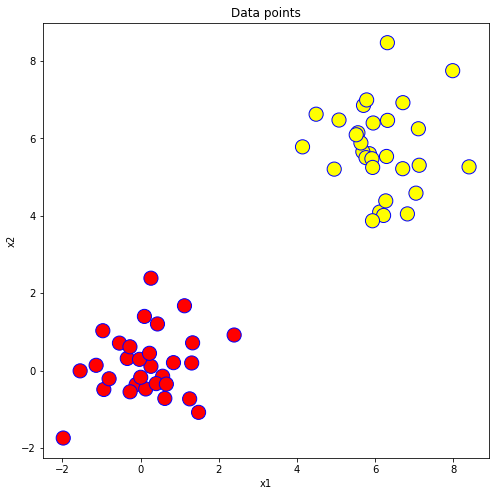

In [ ]:
X, y = make_blobs(n_samples=60, n_features=2, centers=[[0,0], [6,6]], cluster_std=1, random_state=10)
y = np.where(y==0, -1, 1)
plt.style = 'seaborn'
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, marker='o', edgecolor='b', s=200, cmap='autumn', alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

In [ ]:
a = X.dot(svm.w) + svm.b
ab = y * a
np.sum(np.maximum(0,1-ab))

0.040355830557350036

[0.26211557 0.34969821]
-1.91299999999998


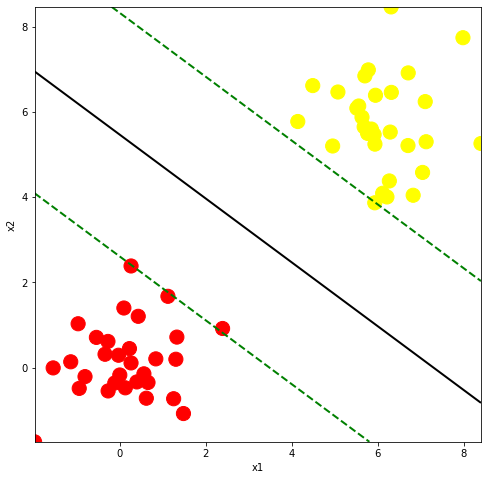

In [ ]:
svm = softSVM(C=1)
svm.fit(X, y)
print(svm.w)
print(svm.b)
svm.plot_decision_boundary()

In [ ]:
def get_hyperplane(x, w, b, offset):
  return -1 * (w[0] * x + b + offset)/w[1]

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, marker='o', s=200, cmap='autumn', edgecolor='k')
#ax = fig.add_subplot(1,1,1)
plt.xlim(np.min(X[:,0]), np.max(X[:,0]))
plt.ylim(np.min(X[:,1]), np.max(X[:,1]))

x0_1 = np.min(X[:,0])
x0_2 = np.max(X[:,0])
#print(x0_1, x0_2)
x1_1 = get_hyperplane(x0_1, svm.w, svm.b, 0)
x1_2 = get_hyperplane(x0_2, svm.w, svm.b, 0)
plt.plot([x0_1, x0_2], [x1_1, x1_2], "y", label='Hyperplane')

x2_1 = get_hyperplane(x0_1, svm.w, svm.b, -1)
x2_2 = get_hyperplane(x0_2, svm.w, svm.b, -1)
plt.plot([x0_1, x0_2], [x2_1, x2_2], "k--", label='Bounding plane-1')

x3_1 = get_hyperplane(x0_1, svm.w, svm.b, 1)
x3_2 = get_hyperplane(x0_2, svm.w, svm.b, 1)
plt.plot([x0_1, x0_2], [x3_1, x3_2], "k--", label='Bounding plane-2')
plt.legend()
plt.show()

In [ ]:
new_point1 = np.array([0, 2.4])
new_point2 = np.array([5.5, 6.5])
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=200, marker='o', cmap='autumn')
plt.scatter(new_point1[0], new_point1[1], c='blue', s=200, marker='o')
plt.scatter(new_point2[0], new_point2[1], c='green', s=200, marker='o')
print('New point1: ', svm.predict(new_point1))
print('New point2: ', svm.predict(new_point2))

## Linearly separable data with some noise

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.1)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap='autumn', marker='o', edgecolor='k')
plt.show()

In [ ]:
y[y==0] =-1
svm = softSVM(C=10)
svm.fit(X, y)
svm.plot_decision_boundary()